In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [20]:
#creating data frame containing data from the respective market indeces: S&P500, NASDAQ, German DAX, and Dow Jones 
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^DJI']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = web.DataReader(t, data_source = 'yahoo', start = '1997-1-1')['Adj Close']

In [21]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980


In [22]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2019-12-19,3205.370117,8887.219727,13211.959961,28376.960938
2019-12-20,3221.219971,8924.959961,13318.900391,28455.089844
2019-12-23,3224.010010,8945.650391,13300.980469,28551.529297
2019-12-24,3223.379883,8952.879883,NaN,28515.449219
2019-12-26,3239.909912,9022.391602,NaN,28621.390625


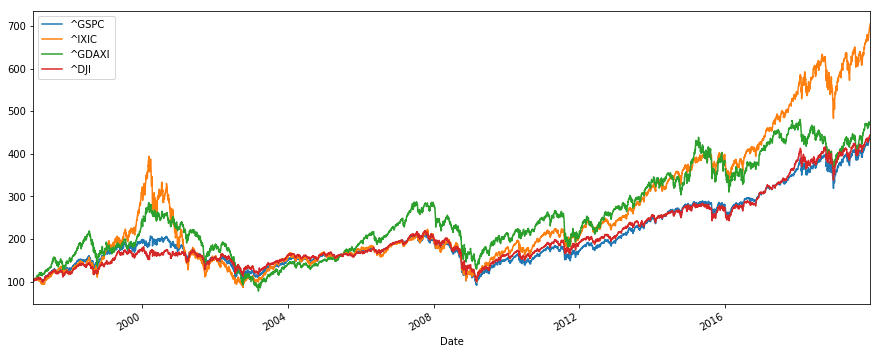

In [23]:
#normalizing data to 100 and visualizing using MatPlotLib
(ind_data / ind_data.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [25]:
#calculating the average simple rate of return of each index and printing the last 5 entries
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI
Date,,,,
2019-12-19,0.004459,0.006738,-0.000771,0.004876
2019-12-20,0.004945,0.004247,0.008094,0.002753
2019-12-23,0.000866,0.002318,-0.001345,0.003389
2019-12-24,-0.000195,0.000808,NaN,-0.001264
2019-12-26,0.005128,0.007764,NaN,0.003715


In [28]:
#calculating the average annual simple rate of return by finding the mean and multiplying by 250
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.081697
^IXIC     0.114793
^GDAXI    0.079999
^DJI      0.080330
dtype: float64

In [39]:
#from this data, we can see that the NASDAQ has had the greatest historical annual return with a rate of 11.48% 
#how do the indeces' performance compare to common stock like P&G or Ford? Let's find out

In [35]:
tickers = ['PG', 'F', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = web.DataReader(t, data_source = 'yahoo', start = '2007-1-1')['Adj Close']

In [36]:
data_2.head()

,PG,F,^GSPC,^DJI
Date,,,,
2007-01-03,43.693184,5.177414,1416.599976,12474.519531
2007-01-04,43.361443,5.308400,1418.339966,12480.690430
2007-01-05,42.989105,5.253247,1409.709961,12398.009766
2007-01-08,43.083870,5.329082,1412.839966,12423.490234
2007-01-09,42.975552,5.370447,1412.109985,12416.599609


In [37]:
data_2.tail()

,PG,F,^GSPC,^DJI
Date,,,,
2019-12-19,124.919998,9.41,3205.370117,28376.960938
2019-12-20,125.360001,9.48,3221.219971,28455.089844
2019-12-23,124.900002,9.44,3224.010010,28551.529297
2019-12-24,125.220001,9.47,3223.379883,28515.449219
2019-12-26,125.220001,9.45,3239.909912,28621.390625


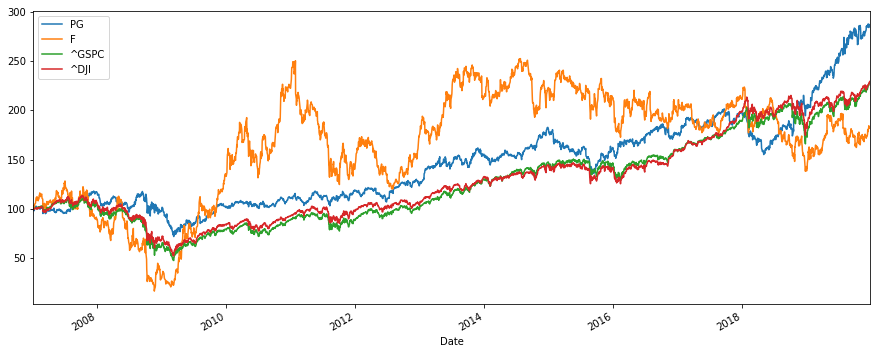

In [40]:
(data_2 / data_2.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [42]:
#we have successsfully compared the performance of stocks to stock indeces!
#here we can see that while Ford and P&G outperformed the S&P 500 and the Dow Jones for up until 2018...
#P&G is currently outperforming the DJI and GSPC while Ford is currently performing worse than the market indeces